In [1]:
#MODULE 1: DATA ACQUISITION

import numpy as np
import pandas as pd

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
#Loading Data
df = pd.read_csv("C:/Users/surya/Metrics/IndiaAffectedWaterQualityAreas.csv",encoding='latin1')
df.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


In [3]:
df.columns

Index(['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'],
      dtype='object')

In [4]:
df.shape

(550242, 8)

In [5]:
df.dtypes

State Name           object
District Name        object
Block Name           object
Panchayat Name       object
Village Name         object
Habitation Name      object
Quality Parameter    object
Year                 object
dtype: object

In [6]:
df.isnull().sum()

State Name           0
District Name        0
Block Name           0
Panchayat Name       0
Village Name         0
Habitation Name      0
Quality Parameter    0
Year                 0
dtype: int64

In [7]:
#MODULE 2: DATA FILTERING

#Checking for Duplicates
Duplicates=df[df.duplicated(keep=False)]
Duplicates.shape

(169, 8)

In [8]:
#Dropping Duplicates
df1=df.drop_duplicates(subset=['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'], keep=False)
df1.shape

(550073, 8)

In [9]:
df1.describe()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
count,550073,550073,550073,550073,550073,550073,550073,550073
unique,27,493,3577,37471,81702,147557,5,4
top,RAJASTHAN,BARMER,BALESAR,RATANPUR,RAMPUR,HARIJAN TOLA,Iron,1/4/2009
freq,131417,43752,8358,797,691,3072,302081,179932


In [10]:
#Iron is the most frequent element that causes water degradation in the country

In [11]:
df1['Quality Parameter'].value_counts()

Iron        302081
Salinity    108923
Fluoride    101035
Arsenic      25705
Nitrate      12329
Name: Quality Parameter, dtype: int64

<AxesSubplot:xlabel='Quality Parameter', ylabel='count'>

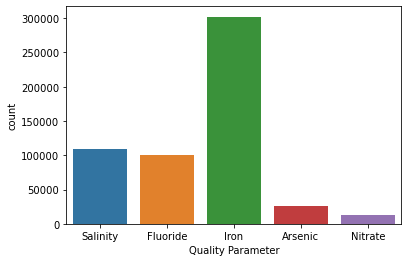

In [12]:
#MODULE 3: DATA PROCESSING PARAMATERS

import seaborn as sns
sns.countplot(df1['Quality Parameter'])

In [13]:
#Rajasthan is recorded in the first place to face water degaradation problems

In [14]:
df1['State Name'].value_counts()
#This may be because area wise Rajasthan is ranked highest in India

RAJASTHAN            131417
BIHAR                 92328
ASSAM                 79910
ORISSA                68618
KARNATAKA             30820
WEST BENGAL           30088
TRIPURA               26113
CHATTISGARH           25062
MADHYA PRADESH        14449
MAHARASHTRA           12480
UTTAR PRADESH          9916
CHHATTISGARH           8815
KERALA                 4800
JHARKHAND              3895
TAMIL NADU             3164
ANDHRA PRADESH         2888
GUJARAT                2092
PUNJAB                 1056
NAGALAND                618
ARUNACHAL PRADESH       612
MEGHALAYA               427
HARYANA                 262
HIMACHAL PRADESH         88
JAMMU AND KASHMIR        67
UTTARAKHAND              57
PUDUCHERRY               17
MANIPUR                  14
Name: State Name, dtype: int64

In [15]:
df1['Quality Parameter'].groupby(df1['State Name']).describe()

,count,unique,top,freq
State Name,,,,
ANDHRA PRADESH,2888,2,Fluoride,2193
ARUNACHAL PRADESH,612,1,Iron,612
ASSAM,79910,3,Iron,74098
BIHAR,92328,4,Iron,69962
CHATTISGARH,25062,5,Iron,24439
CHHATTISGARH,8815,3,Iron,8339
GUJARAT,2092,4,Fluoride,804
HARYANA,262,2,Fluoride,244
HIMACHAL PRADESH,88,3,Salinity,72


In [16]:
#Splitting the Year column to retain just the year
df1['year'] = pd.DatetimeIndex(df1['Year']).year
df1=df1.drop(columns='Year')

In [17]:
#Considering the top 4 affected states RAJASTHAN,BIHAR,ASSAM & ORISSA

In [18]:
#Subsetting the data
df1_new=df1.loc[df['State Name'].isin(['RAJASTHAN','BIHAR','ASSAM','ORISSA'])] 
Subset_Data = df1_new[['State Name', 'Quality Parameter', 'year']]

In [19]:
#Assigning a numerical value to all the Quality Parameters- Nominal scale
import sklearn
from sklearn.preprocessing import LabelEncoder
numbers = LabelEncoder()
Subset_Data['Quality'] = numbers.fit_transform(Subset_Data['Quality Parameter'].astype('str'))

In [20]:
State_Quality_Count = pd.DataFrame({'count' : Subset_Data.groupby( [ "State Name", "Quality","Quality Parameter"] ).size()}).reset_index()
State_Quality_Count.head()

,State Name,Quality,Quality Parameter,count
0,ASSAM,0,Arsenic,4775
1,ASSAM,1,Fluoride,1037
2,ASSAM,2,Iron,74098
3,BIHAR,0,Arsenic,6215
4,BIHAR,1,Fluoride,16150


In [21]:
High_Quality_count = State_Quality_Count.sort_values(['count'], ascending=[False])
High_Quality_count.head()

,State Name,Quality,Quality Parameter,count
16,RAJASTHAN,4,Salinity,87137
2,ASSAM,2,Iron,74098
5,BIHAR,2,Iron,69962
9,ORISSA,2,Iron,59903
13,RAJASTHAN,1,Fluoride,40417


In [22]:
State_Quality_Count_year = pd.DataFrame({'count' : Subset_Data.groupby( [ "State Name", "Quality","Quality Parameter","year"] ).size()}).reset_index()
State_Quality_Count_year

,State Name,Quality,Quality Parameter,year,count
0,ASSAM,0,Arsenic,2009,810
1,ASSAM,0,Arsenic,2010,719
2,ASSAM,0,Arsenic,2011,2089
3,ASSAM,0,Arsenic,2012,1157
4,ASSAM,1,Fluoride,2009,517
...,...,...,...,...,...
57,RAJASTHAN,3,Nitrate,2012,624
58,RAJASTHAN,4,Salinity,2009,24787
59,RAJASTHAN,4,Salinity,2010,23168
60,RAJASTHAN,4,Salinity,2011,20258


In [23]:
State_Quality_Count_year['rank']=State_Quality_Count_year.groupby(['State Name','Quality'])['count'].rank("dense", ascending=False)
State_Quality_Count_year.head()
# Ordinal Scale ranking


,State Name,Quality,Quality Parameter,year,count,rank
0,ASSAM,0,Arsenic,2009,810,3.0
1,ASSAM,0,Arsenic,2010,719,4.0
2,ASSAM,0,Arsenic,2011,2089,1.0
3,ASSAM,0,Arsenic,2012,1157,2.0
4,ASSAM,1,Fluoride,2009,517,1.0


In [24]:
Top_count=State_Quality_Count_year[State_Quality_Count_year['rank']==1]

In [25]:
#The top 5 states considered have encountered the highest water degradtion in the year of 2009

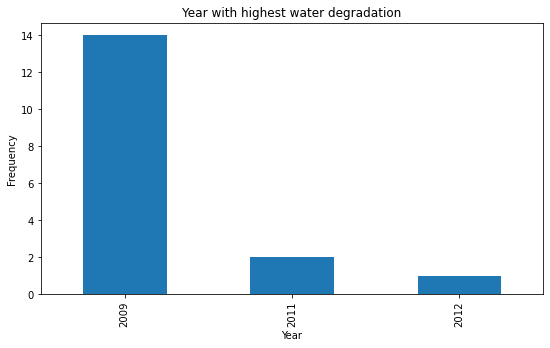

In [26]:
import matplotlib.pyplot as plt
freq_plot = Top_count['year'].value_counts().plot(kind='bar',figsize=(9,5),title="Year with highest water degradation")
freq_plot.set_xlabel("Year")
freq_plot.set_ylabel("Frequency")
plt.show()

In [27]:
#Applying this concept to the entire data to see the worst and best year for water quality

#2009 remained to be the year with highest degration where as 2011 has shifted to last position when plotted on entire data

In [28]:
Subset_Data2 = df1[['State Name', 'Quality Parameter', 'year']]
Subset_Data2['Quality'] = numbers.fit_transform(Subset_Data2['Quality Parameter'].astype('str'))
SQT = pd.DataFrame({'count' : Subset_Data2.groupby( [ "State Name", "Quality","Quality Parameter","year"] ).size()}).reset_index()
SQT['rank']=SQT.groupby(['State Name','Quality'])['count'].rank("dense", ascending=False)
Top_count2=SQT[SQT['rank']==1]

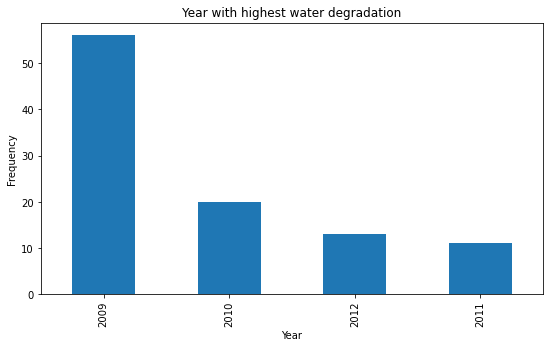

In [29]:
freq_plot = Top_count2['year'].value_counts().plot(kind='bar',figsize=(9,5),title="Year with highest water degradation")
freq_plot.set_xlabel("Year")
freq_plot.set_ylabel("Frequency")
plt.show()

In [30]:
#Trend of Quality Parameters over the years

#Except Nitrate, all the Quality Parameters followed a similar pattern through out the years. The amount of all the elements resuced significantly over years.

In [31]:
Quality = pd.DataFrame({'count' : Subset_Data2.groupby( [ "Quality","year"] ).size()}).reset_index()
Quality.head()

,Quality,year,count
0,0,2009,9504
1,0,2010,6548
2,0,2011,5339
3,0,2012,4314
4,1,2009,33361


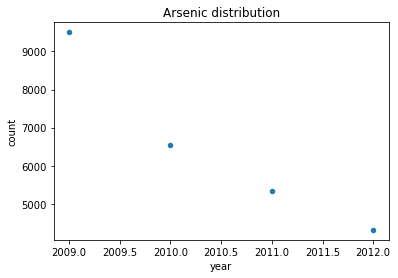

In [32]:
#MODULE 4: REPORT

Arsenic=Quality[Quality['Quality']==0]
Arsenic.plot('year','count',kind='scatter', layout=(5,5),title= "Arsenic distribution")
plt.show()

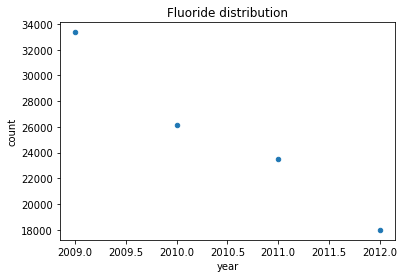

In [33]:
Fluoride=Quality[Quality['Quality']==1]
Fluoride.plot("year",'count',kind='scatter', layout=(5,5),title= "Fluoride distribution")
plt.show()

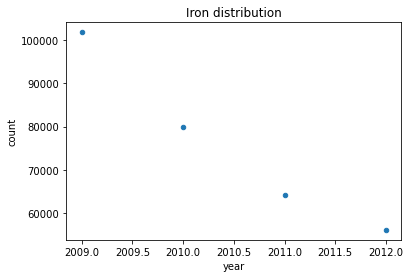

In [34]:
Iron=Quality[Quality['Quality']==2]
Iron.plot('year','count',kind='scatter', layout=(5,5),title= "Iron distribution")
plt.show()

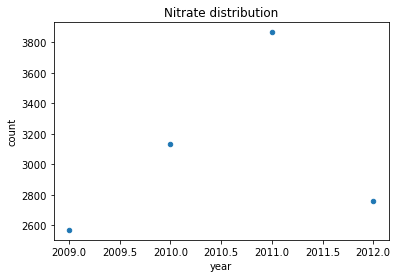

In [35]:
Nitrate=Quality[Quality['Quality']==3]
Nitrate.plot('year','count',kind='scatter', layout=(5,5),title= "Nitrate distribution")
plt.show()

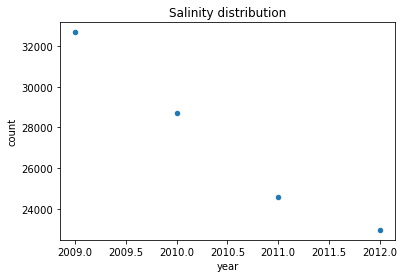

In [36]:
Salinity=Quality[Quality['Quality']==4]
Salinity.plot('year','count',kind='scatter', layout=(5,5),title= "Salinity distribution")
plt.show()

In [37]:
#Digging deep to know the reasons why Nitrate peaked its value in 2011 and in which states

In [38]:
#In 2011

In [39]:
State_Quality = pd.DataFrame({'count' : Subset_Data2.groupby( [ "State Name","Quality","year"] ).size()}).reset_index()
State_Nitrate_Quality=State_Quality[(State_Quality['year']==2011) & (State_Quality['Quality']==3)]
State_Nitrate_Quality.sort_values(['count'], ascending=[False])

,State Name,Quality,year,count
112,KARNATAKA,3,2011,1769
226,RAJASTHAN,3,2011,1106
160,MAHARASHTRA,3,2011,763
57,GUJARAT,3,2011,147
128,KERALA,3,2011,46
190,ORISSA,3,2011,28
240,TAMIL NADU,3,2011,3
280,UTTARAKHAND,3,2011,2
95,JHARKHAND,3,2011,1
144,MADHYA PRADESH,3,2011,1


In [40]:
#In 2010

In [41]:
State_Nitrate_Quality1=State_Quality[(State_Quality['year']==2010) & (State_Quality['Quality']==3)]
State_Nitrate_Quality1.sort_values(['count'], ascending=[False])

,State Name,Quality,year,count
159,MAHARASHTRA,3,2010,1225
225,RAJASTHAN,3,2010,856
111,KARNATAKA,3,2010,655
56,GUJARAT,3,2010,191
239,TAMIL NADU,3,2010,106
127,KERALA,3,2010,53
189,ORISSA,3,2010,28
43,CHATTISGARH,3,2010,8
143,MADHYA PRADESH,3,2010,6
263,UTTAR PRADESH,3,2010,2


In [42]:
#Karnataka and Rajasthan has high amounts of Nitrate in 2011 accounting approximately 47% and 29% of the total .

#Also from 2010 to 2011, the amount of Nitrate got tripled in Karnataka and halved in Maharashtra.
#This might be numerous reasons for this increase like high use of inorganic fertilizers, pipeline leakages, 
#Industrial pollution etc.